Mean Squared Error: 25.44692129000756
Root Mean Squared Error (RMSE): 5.044494156008862
Mean Absolute Error (MAE): 3.5097281293871103
R² (R-squared): 0.704375827445999


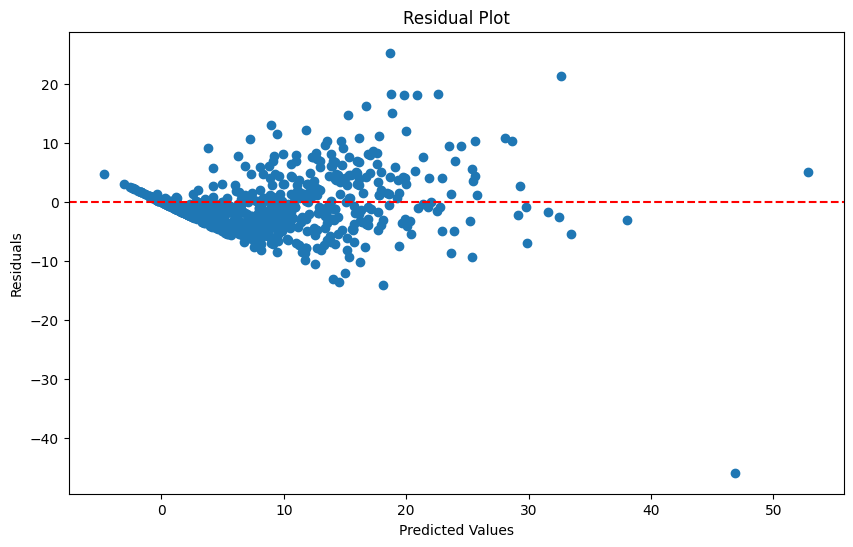

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


players_df = pd.read_csv('../../data/processed/lr_model1_training_testing_dataset.csv')
players_df.dropna(ignore_index=True, inplace=True)

# preparing the training/testing splits
training_df = players_df[players_df['Season'] != 2024].reset_index(drop=True)
testing_df = players_df[players_df['Season'] == 2024].reset_index(drop=True)

# preparing the training/testing splits
X_train = training_df.drop(columns=['HR', 'Season'])
y_train = training_df['HR']

X_test = testing_df.drop(columns=['HR', 'Season'])
y_test = testing_df['HR']

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model (e.g., using Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# MSE is already computed, so we take its square root to get RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

r2 = r2_score(y_test, y_pred)
print("R² (R-squared):", r2)

# Residuals (actual - predicted values)
residuals = y_test - y_pred

# Plotting residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Horizontal line at 0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [2]:
X_train.insert(0, 'intercept', 1)
X_test.insert(0, 'intercept', 1)
sm_model = sm.OLS(y_train, X_train).fit()
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HR   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     685.0
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:05:46   Log-Likelihood:                -20543.
No. Observations:                6826   AIC:                         4.114e+04
Df Residuals:                    6799   BIC:                         4.132e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          -5.5711      2.115     -2.634      0.008      -9.717      -1.425
season_factor       2.2822      0.398      5.740      0.000       1.503       3.062
tmFactor            7.3054      0.461     15.839      0.000       6.401       8.210
Age                 0.0551      0.828      0.067      0.947      -1.569       1.679
3B                  0.4678      0.052      8.938      0.000       0.365       0.570
IBB                 1.0766      0.032     33.347      0.000       1.013       1.140
GDP                 0.5978      0.018     32.473      0.000       0.562       0.634
IFH                 0.3557      0.019     18.670      0.000       0.318       0.393
BUH                -0.3563      0.058     -6.103      0.000      -0.471      -0.242
K%                  1.9172      0.765      2.505      0.012       0.417       3.418
BB/K                0.0916      0.283      0.324      0.746      -0.462       0.646
BABIP              -1.8392      0.511     -3.601      0.000      -2.840      -0.838
GB/FB              -0.1107      0.042     -2.642      0.008      -0.193      -0.029
IFFB%               0.6215      0.558      1.114      0.265      -0.472       1.715
HR/FB              11.3864      0.792     14.370      0.000       9.833      12.940
IFH%               -1.7966      0.791     -2.271      0.023      -3.347      -0.246
BUH%                1.7565      0.284      6.195      0.000       1.201       2.312
Spd                -0.1978      0.038     -5.168      0.000      -0.273      -0.123
EV                  0.0014      0.021      0.067      0.947      -0.039       0.042
LA                  0.0406      0.007      5.722      0.000       0.027       0.055
Barrel%            32.2869      1.696     19.037      0.000      28.962      35.612
maxEV               0.0373      0.014      2.716      0.007       0.010       0.064
HardHit%           -0.0346      0.651     -0.053      0.958      -1.310       1.241
O-Contact% (pi)    -0.4014      0.392     -1.023      0.306      -1.171       0.368
Z-Contact% (pi)    -1.7957      0.775     -2.316      0.021      -3.316      -0.276
Zone% (pi)         -4.9659      1.142     -4.348      0.000      -7.205      -2.727
Pace (pi)          -0.0992      0.029     -3.429      0.001      -0.156      -0.042
==============================================================================
Omnibus:                     1075.242   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9598.681
Skew:                           0.482   Prob(JB):                         0.00
Kurtosis:                       8.729   Cond. No.                     5.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly 

In [3]:
y_test_predictions = sm_model.predict(X_test)

r2 = r2_score(y_test, y_test_predictions)

print(f"R squared: {r2}")

R squared: 0.7043758274459984
